## This notebook is in development

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from definitions import ROOT_DIR
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif',
             'sans-serif':['Helvetica'],
             'size':16})

- Inputs

In [2]:
p_root_dir = Path(ROOT_DIR).parents[0]
p_data = p_root_dir / "3_model_evaluation\model_evaluation"
p_out = p_root_dir / "6_plots/q0_plots"

# Metrics and Catboost predictions for all ions in their target wells
p_predictions = p_data / "labelles_set_predictions_11-Dec-2021.csv"

data = pd.read_csv(p_predictions)
data['log_int_ratio'] = np.log10(data.intensity_vs_far_bg_ratio)
# data['log_occ_ratio'] = np.log10(data.occupancy_vs_far_bg_ratio)

C:\Users\saharuka\.conda\envs\zimmerman\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


- Plot catboost prediction vs metrics

[Text(0.5, 0, 'Intensity ratio'), Text(0, 0.5, 'Occupancy ratio')]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


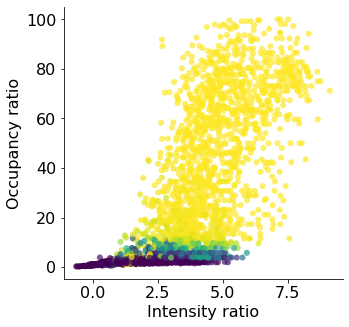

In [3]:
cmap='viridis'

plt.figure(figsize=(5,5))
g = sns.scatterplot(data=data, 
                x='log_int_ratio', y='occupancy_vs_far_bg_ratio', hue='pred_val', 
                linewidth = 0, alpha=0.7, palette=cmap, legend=False)

# Edit plot area
sns.despine()

# Edit axes
g.set(xlabel='Intensity ratio', ylabel='Occupancy ratio')
# g.figure.savefig(p_out / f"draft_axes.pdf")

- Plot catboost prediction histogram

In [4]:
def fp_rate(x):
    fp = sum((labelled_data.pred_val >= x) & (labelled_data.score==0))
    tn = sum((labelled_data.pred_val < x) & (labelled_data.score==0))
    return fp/(fp+tn)
    
def fn_rate(x):
    fn = sum((labelled_data.pred_val < x) & (labelled_data.score==1))
    tp = sum((labelled_data.pred_val >= x) & (labelled_data.score==1))
    return fn/(fn+tp)

In [5]:
labelled_data = data[~data.score.isna()]

X = np.linspace(0,1,100)
Y_fp_rate = [fp_rate(x) for x in X]
Y_fn_rate = [fn_rate(x) for x in X]

C:\Users\saharuka\.conda\envs\zimmerman\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\saharuka\.conda\envs\zimmerman\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


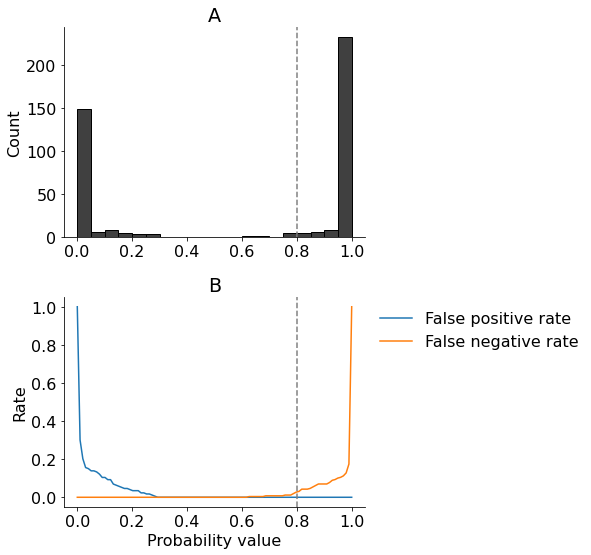

In [159]:
fig, axes = plt.subplots(2, 1, figsize=(8.5,8))

# Plot histogram
h = sns.histplot(data=labelled_data, 
             x='pred_val', 
             bins=20, 
             ax=axes[0],
             color = 'black')
h.axvline(0.8, linestyle = '--', color = 'grey')
# Edit axes
h.set(xlabel='', ylabel='Count', title='A')

# Plot lineplot
l = sns.lineplot(X, Y_fp_rate, label = "fp_rate", ax=axes[1])
sns.lineplot(X, Y_fn_rate, label = "fn_rate", ax=axes[1])
# Add vertical line
l.axvline(0.8, linestyle = '--', color = 'grey')
# Edit axes
l.set(xlabel = 'Probability value', ylabel = 'Rate', title='B')

# Edit legend
legend_labels, _= l.get_legend_handles_labels()
l.legend(legend_labels, ['False positive rate','False negative rate'], frameon=False, bbox_to_anchor=(1,1))

# Edit plot area
sns.despine()
fig.tight_layout()

In [160]:
fig.savefig(p_out / f"probability_value.pdf")